In [25]:
from Class_utils.parameters import *
from Class_utils.JobGraph import JobGraph

In [26]:
job_graph = JobGraph(file_paths, **job_graph_par)

Cache found loading...done


In [27]:
id_occ, _ , _ = job_graph.sample_occupation()

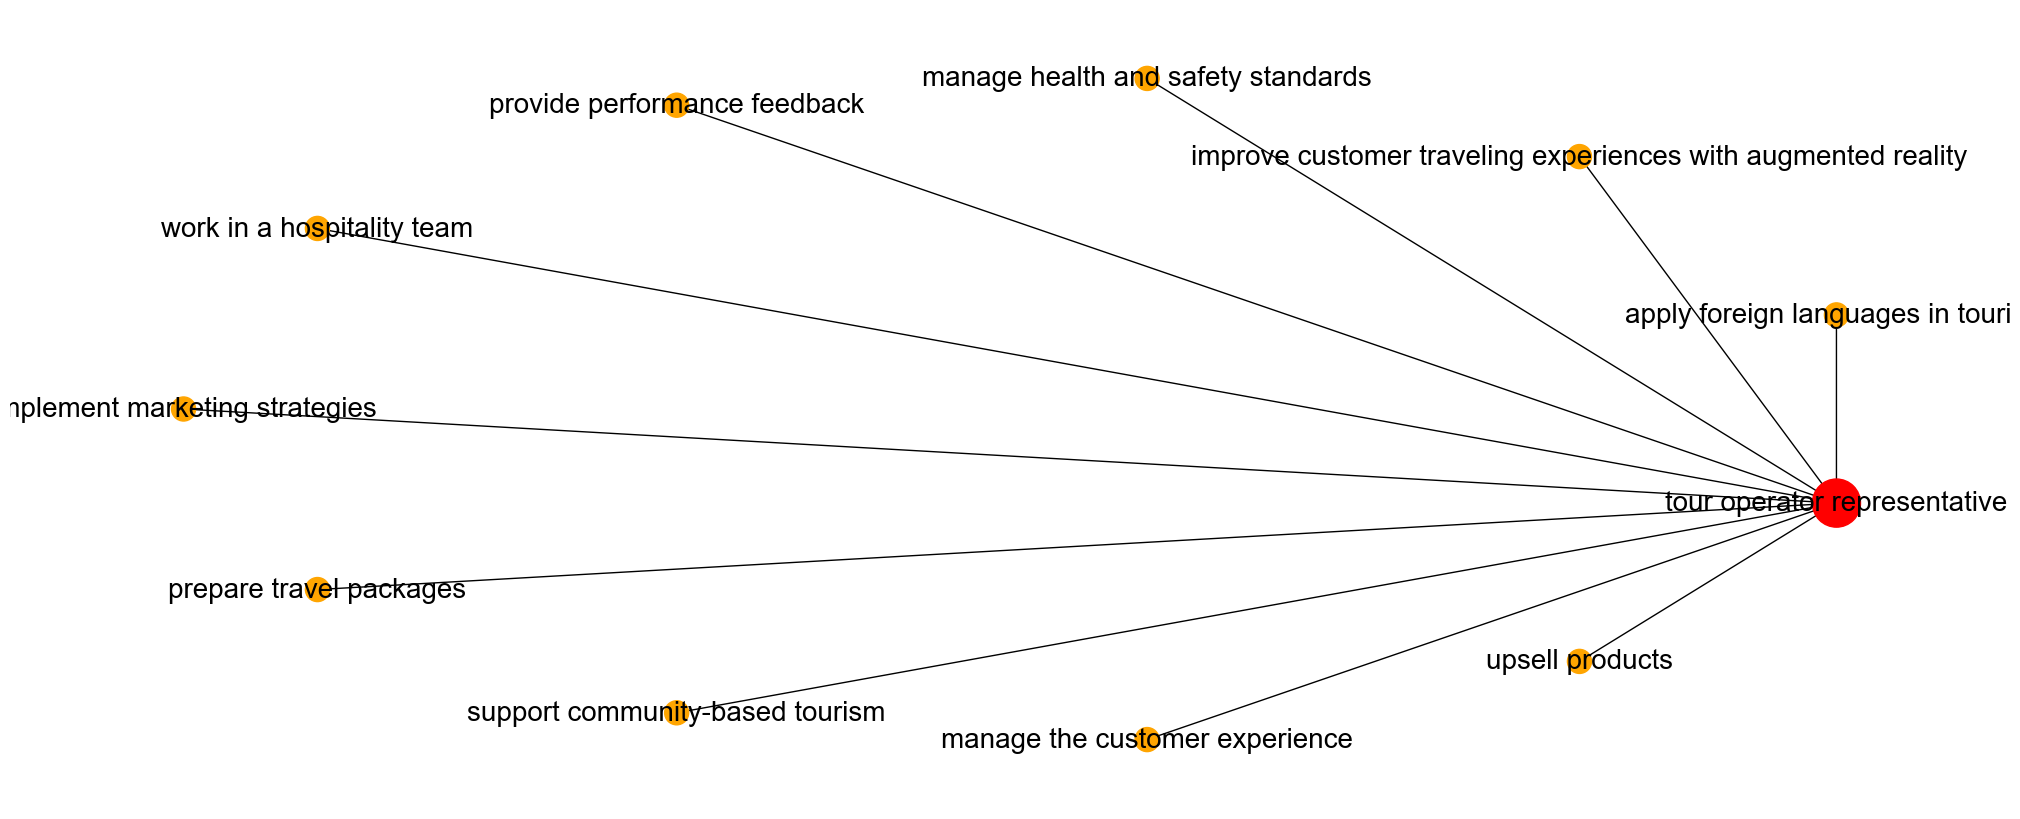

In [28]:
job_graph.show_subgraph(id_occ, 10)

In [29]:
from node2vec import Node2Vec
import matplotlib.pyplot as plt

# Generate node embeddings using node2vec
node2vec = Node2Vec(job_graph.graph, dimensions=64, walk_length=30, num_walks=200, workers=8) # You can adjust these parameters
model = node2vec.fit(window=10, min_count=1, batch_words=4) # Training the model

# Visualize node embeddings using t-SNE
from sklearn.manifold import TSNE
import numpy as np

# Get embeddings for all nodes
embeddings = np.array([model.wv[node] for node in job_graph.graph.nodes()])

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=10, n_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

# Add node labels
for i, node in enumerate(job_graph.graph.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)
plt.title('Node Embeddings Visualization')
plt.show()

Computing transition probabilities: 100%|██████████| 16411/16411 [00:28<00:00, 578.97it/s] 


KeyboardInterrupt: 